In [22]:
from algorithms.k_armed_bandit import bandit_algorithm
from algorithms.upper_confidence import upper_confidence
import matplotlib.pyplot as plt
import numpy as np


### The 10-armed Testbed

In [19]:
# test code
epsilon_values = [0.1, 0.01, 0.0]
collected_test = []
runs = 2000
time = 1000
k_arm = 10
# collect all rewards and optimal action in each test
for epsilon in epsilon_values:
    rewards, optimal = bandit_algorithm(k_arm, epsilon, runs, time)
    collected_test.append([rewards, optimal])


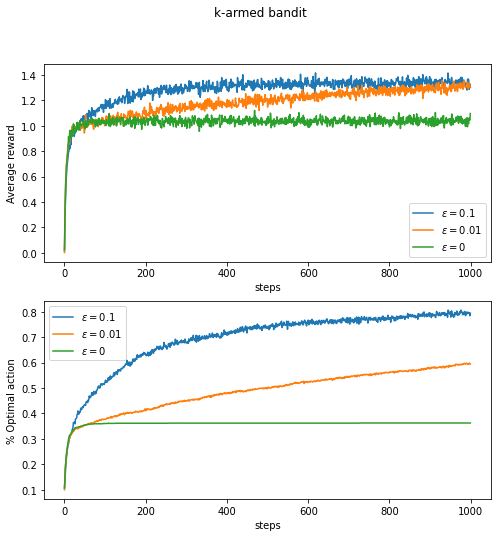

In [20]:
# plot prev_test
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
plt.suptitle("k-armed bandit")

axes[0].set_xlabel("Steps")
axes[0].set_ylabel("Average reward")

axes[1].set_xlabel("Steps")
axes[1].set_ylabel("% Optimal action")

for i, test in enumerate(collected_test):
    axes[0].plot(test[0], label='$\epsilon = %g$' % (epsilon_values[i]))
    axes[1].plot(test[1], label='$\epsilon = %g$' % (epsilon_values[i]))

axes[0].legend()
axes[1].legend()

plt.show()


### Upper-Confidence-Bound Action Selection

In [17]:
time = 1000
runs = 2000
c = 2.0
k_arm = 10
# Obs: divide by zero: If Nt(a) = 0, then a is considered to be a maximizing action
collected_reward = upper_confidence(k_arm, runs, time, c)

c:\Users\jbard\OneDrive\Documents\UNI\22-I\Reinforcement Learning\reinforcement-learning\algorithms\upper_confidence.py:23: RuntimeWarning: invalid value encountered in true_divide
  action = np.argmax(q_estimated + c * np.sqrt(math.log(t + 1) / action_count))
c:\Users\jbard\OneDrive\Documents\UNI\22-I\Reinforcement Learning\reinforcement-learning\algorithms\upper_confidence.py:23: RuntimeWarning: divide by zero encountered in true_divide
  action = np.argmax(q_estimated + c * np.sqrt(math.log(t + 1) / action_count))


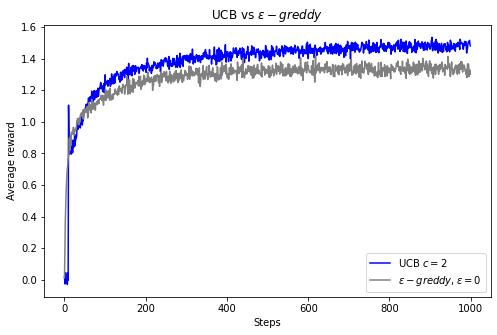

In [36]:
plt.figure(figsize=(8, 5))
plt.title("UCB vs $\epsilon-greddy$")
plt.plot(collected_reward, label="UCB $c=%d$" % c, c="b")
plt.plot(collected_test[0][0], label="$\epsilon-greddy, \epsilon = %d$"%epsilon_values[0], c="gray")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.legend()
plt.show()
